# Boyer-Moore Algorithm

In [ ]:
CHAR_SIZE = 256

class BoyerMooreSearch:

  def __init__(self,pattern):
    self.pattern = pattern.lower()
    self.delta_1 = self.bad_character_table(self.pattern)
    self.delta_2 = self.good_suffix_table(self.pattern)


  def bad_character_table(self, pattern):
    delta_1 = [-1]*CHAR_SIZE

    for idx,p in enumerate(pattern):
      # delta_1[ord(p)-ord('a')] = idx
      delta_1[ord(p)] = idx

    return delta_1
  
  def good_suffix_table(self, pattern):
    p = 0
    pat_len = len(pattern)
    i, j = pat_len, pat_len + 1
    delta_2 = [0] * j
    suffix_idx = [0] * j
    suffix_idx[i] = j
    
    while i > 0:
      
      while j <= pat_len and pattern[i-1] != pattern[j-1]:
        if delta_2[j] == 0:
          delta_2[j] = j - i
        
        j = suffix_idx[j]

      i -= 1
      j -= 1
      suffix_idx[i] = j

    offset = suffix_idx[0]

    while p < pat_len + 1:
      if delta_2[p] == 0:
        delta_2[p] = offset
      
      if p == offset:
        offset = suffix_idx[offset]
      
      p += 1
    
    return delta_2

  def get_delta_1(self, text, idx):
    # return self.delta_1[ord(text[idx]) - ord('a')]
    return self.delta_1[ord(text[idx])]


  def search(self, text):
    text = text.lower()
    shift = 0
    pat_len = len(self.pattern)
    txt_len = len(text)
    match_found = list()

    while shift <= txt_len - pat_len :
      j = pat_len - 1

      while j >= 0 and self.pattern[j] == text[shift + j] :
        j -= 1

      if j < 0 :
        # print("Pattern found at index : ", shift)
        match_found.append(shift)
        match_end = shift + pat_len
        shift_1 = (pat_len - self.get_delta_1(text, match_end) if match_end < txt_len else 1)
        shift_2 = self.delta_2[0]
        
      else :
        shift_1 = max(1, j - self.get_delta_1(text, shift + j))
        shift_2 = self.delta_2[j + 1]
        
      # print("Delta-1 shift : ", shift_1)
      # print("Delta-2 shift : ", shift_2)
        
      shift += max(shift_1, shift_2)

    return match_found


In [ ]:
import time

text = "GTTATAGCTGATCGCGGCGTAGCGGCGAA"
pat =  "GTAGCGGCG" 
bm = BoyerMooreSearch(pat)
start_time = time.time()
match_found = bm.search(text)
print(round((time.time() - start_time) * 1000,4))
print(match_found)

0.1187
[18]


# Boyer-Moore Horspool algorithm

In [ ]:
CHAR_SIZE = 256

class BoyerMooreHorspoolSearch:

  def __init__(self,pattern):
    self.pattern = pattern.lower()
    self.delta_1 = self.bad_character_table(self.pattern)


  def bad_character_table(self, pattern):
    delta_1 = [-1]*CHAR_SIZE

    for idx in range(len(pattern)-1):
      # delta_1[ord(p)-ord('a')] = idx
      delta_1[ord(pattern[idx])] = idx

    return delta_1


  def get_delta_1(self, text, idx):
    # return self.delta_1[ord(text[idx]) - ord('a')]
    return self.delta_1[ord(text[idx])]


  def search(self, text):
    text = text.lower()
    shift = 0
    pat_len = len(self.pattern)
    txt_len = len(text)
    match_found = list()

    while shift <= txt_len - pat_len :
      j = pat_len - 1

      while j >= 0 and self.pattern[j] == text[shift + j] :
        j -= 1

      if j < 0 :
        # print("Pattern found at index : ", shift)
        match_found.append(shift)
        match_end = shift + pat_len - 1
        shift_1 = (pat_len - self.get_delta_1(text, match_end) if match_end < txt_len else 1)
        
      else :
        shift_1 = max(1, (pat_len-1) - self.get_delta_1(text, shift + pat_len-1))
        
      # print("Delta-1 shift : ", shift_1)
      # print("Delta-2 shift : ", shift_2)
        
      shift +=shift_1

    return match_found

In [ ]:
import time

text = "GTTATAGCTGATCGCGGCGTAGCGGCGAA"
pat =  "GTAGCGGCG" 
bmh = BoyerMooreHorspoolSearch(pat)
start_time = time.time()
match_found = bmh.search(text)
print(round((time.time() - start_time) * 1000,4))
print(match_found)

0.1545
[18]


# Knuth-Morris-Pratt Algorithm

In [ ]:
class KnuthMorrisPrattSearch:
  def __init__(self,pattern):
    self.pattern = pattern.lower()
    self.pat_table = self.computePatternTable(self.pattern)

  def computePatternTable(self, pat):
    # Compute a pattern table for pattern string pat
    m = len(pat)
    pat_table = [-1]*m # Initialize it all with -1
    k = -1
    for i in range(0, m-1): 
      # iterate through the array
      # Loop Invariant: pat[0].. pat[k] is the largest suffix for
      #                 pat[0].. pat[i]
      #                 if k == -1, no prefix of pat is a suffix for
      #                 pat[0] .. pat[i]
      
      if pat[k+1] == pat[i+1]: # Can we extend the match by one more?
        pat_table[i+1] = k + 1 # Yes
        k = k + 1
      else: 
        # If pat[0].. pat[k+1] is not a suffix for 
        # pat[0]..pat[i+1], try pat[0].. pat[pat_table[k]+1] now?
        while ( k >= 0 and pat[k+1] != pat[i+1]):
          k = pat_table[k]
        if pat[k+1] == pat[i+1]:# we found a suffix 
          pat_table[i+1] = k + 1
          k = k + 1
        else: # we ended up going all the way to the beginning
          pat_table[i+1] = -1
          k = -1

    return pat_table

  def search(self, text):
    text = text.lower()
    k = -1
    n = len(text)
    m = len(self.pattern)
    match_found = list()

    for i in range(n):
      # iterate through the text 
      #print(i,k)
      if text[i] == self.pattern[k+1]:
        k = k + 1
      else: 
        # we matched text[i-k-1].. text[i-1] to pat[0].. pat[k]
        while (k >= 0 and self.pattern[k+1] != text[i]):
          k = self.pat_table[k]
        if self.pattern[k+1] == text[i]:
          k = k + 1
        else:
          k = -1 
      #print(f'k = {k}, m = {m}')
      if k >= m-1:
        # print(f'Match found ending at position {i}')
        match_found.append(i)
        k = self.pat_table[k]
    
    return match_found

In [ ]:
import time

text = "GTTATAGCTGATCGCGGCGTAGCGGCGAA"
pat =  "GTAGCGGCG" 
kmp = KnuthMorrisPrattSearch(pat)
start_time = time.time()
match_found = kmp.search(text)
print(round((time.time() - start_time) * 1000,4))
print(match_found)

0.0792
[26]


# Naive Approach

In [ ]:
class NaiveSearch:
  def __init__(self, pattern):
    self.pattern = pattern.lower()

  def search(self, text):
    text = text.lower()
    m = len(self.pattern)
    n = len(text)
    match_found = list()
    
    for i in range(n-m+1):
      count = 0
      for j in range(m):
        if text[i + j] == self.pattern[j]:
          count += 1
        else:
          break
      if count == m:
        match_found.append(i)

    return match_found

In [ ]:
import time

text = "GTTATAGCTGATCGCGGCGTAGCGGCGAA"
pat =  "GTAGCGGCG" 
ns = NaiveSearch(pat)
start_time = time.time()
match_found = ns.search(text)
print(round((time.time() - start_time) * 1000,4))
print(match_found)

0.1464
[18]


# Comparative Analysis

In [ ]:
import signal
from contextlib import contextmanager

class TimeoutException(Exception): pass

@contextmanager
def time_limit(seconds):
    def signal_handler(signum, frame):
      raise TimeoutException("Timed out!")
    signal.signal(signal.SIGALRM, signal_handler)
    signal.alarm(seconds)
    try:
      yield
    finally:
      signal.alarm(0)


In [ ]:
import time

def process_text(file_name):
  with open(file_name, 'r') as file:
    data = file.read().replace('\n', '')
  return data

def bm_seacrh_duration(text, pat):
  bm = BoyerMooreSearch(pat)
  start_time = time.time()
  match_found = bm.search(text)
  return round((time.time() - start_time), 4)

def bmh_seacrh_duration(text, pat):
  bmh = BoyerMooreHorspoolSearch(pat)
  start_time = time.time()
  match_found = bmh.search(text)
  return round((time.time() - start_time), 4)


def kmp_seacrh_duration(text, pat):
  kmp = KnuthMorrisPrattSearch(pat)
  start_time = time.time()
  match_found = kmp.search(text)
  return round((time.time() - start_time), 4)


def naive_seacrh_duration(text, pat):
  ns = NaiveSearch(pat)
  start_time = time.time()
  match_found = ns.search(text)
  return round((time.time() - start_time), 4)


## DNA Search Example

In [ ]:
import pandas as pd

# df = open('data/dna_patterns.txt', 'r')
df = pd.read_csv('data/dna_patterns.txt',header=None)
df['pat_len'] = df.apply(lambda row: len(row[0]), axis=1)
new_df = df.groupby('pat_len').sample(n=10, random_state=1)

In [ ]:
dna = process_text('data/dna.txt')

with open('data/dna_results.csv','w+') as results:
  for dna_seq in new_df[0]:
    try:
      bm_time = bm_seacrh_duration(dna, dna_seq)
      bmh_time = bmh_seacrh_duration(dna, dna_seq)
      kmp_time = kmp_seacrh_duration(dna, dna_seq)
      with time_limit(5):
        ns_time = naive_seacrh_duration(dna, dna_seq)

    except TimeoutException as e:
      ns_time = 5

    results.write(str(len(dna_seq)) + "," + str(bm_time) + "," + str(bmh_time) + "," + str(kmp_time) + "," + str(ns_time) + "\n")

In [ ]:
dna_df = pd.read_csv('data/dna_results.csv',header=None)
dna_df.rename(columns = {0:'pattern_length', 1:'boyer-moore', 2:'boyer-moore-horspool', 3:'knuth-moris-pratt', 4:'naive-approach'}, inplace = True)
dna_res_df = dna_df.groupby('pattern_length', as_index=False).agg('mean')
dna_res_df.columns

Index(['pattern_length', 'boyer-moore', 'boyer-moore-horspool',
       'knuth-moris-pratt', 'naive-approach'],
      dtype='object')

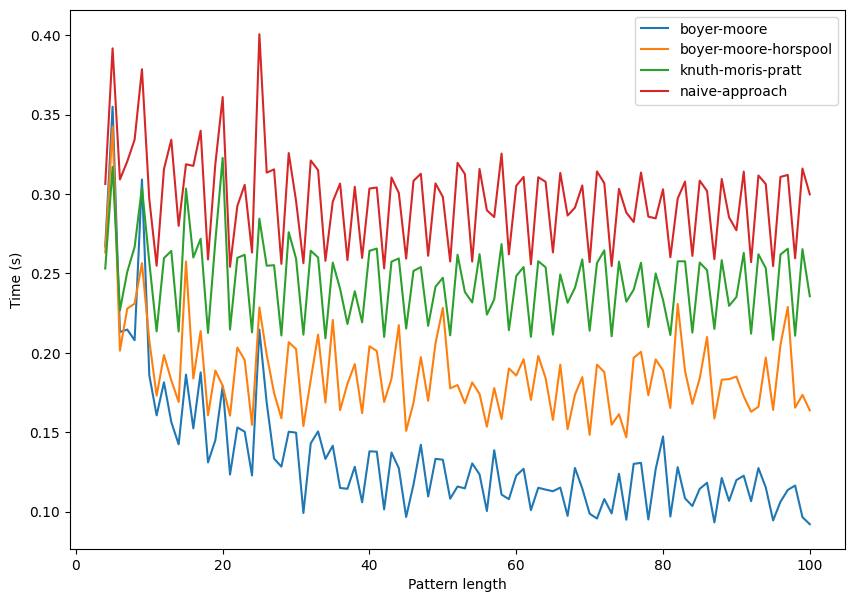

In [ ]:
import matplotlib.pyplot as mp

ax = dna_res_df.plot(x='pattern_length', y=['boyer-moore', 'boyer-moore-horspool', 'knuth-moris-pratt', 'naive-approach'], kind="line", figsize=(10, 7))
ax.set_ylabel('Time (s)')
ax.set_xlabel('Pattern length')
ax.figure.savefig('data/dna_plots.png')

## English Search

In [ ]:
import pandas as pd

# df = open('data/dna_patterns.txt', 'r')
df = pd.read_csv('data/english_patterns.txt',header=None)
print(df)
df['pat_len'] = df.apply(lambda row: len(str(row[0])), axis=1)
new_df = df.groupby('pat_len').sample(n=10, random_state=1, replace=True)
new_df.pat_len.value_counts()
new_df.shape

                   0
0                the
1                 of
2                and
3                 to
4                  a
...              ...
9882       varieties
9883           arbor
9884       mediawiki
9885  configurations
9886          poison

[9887 rows x 1 columns]


(170, 2)

In [ ]:
eng = process_text('data/english.txt')

with open('data/eng_results.csv','w+') as results:
  for word in new_df[0]:
    try:
      bm_time = bm_seacrh_duration(eng, word)
      bmh_time = bmh_seacrh_duration(eng, word)
      kmp_time = kmp_seacrh_duration(eng, word)
      with time_limit(5):
        ns_time = naive_seacrh_duration(eng, word)

    except TimeoutException as e:
      ns_time = 5

    results.write(str(len(word)) + "," + str(bm_time) + "," + str(bmh_time) + "," + str(kmp_time) + "," + str(ns_time) + "\n")

In [ ]:
eng_df = pd.read_csv('data/eng_results.csv',header=None)
eng_df.rename(columns = {0:'pattern_length', 1:'boyer-moore', 2:'boyer-moore-horspool', 3:'knuth-moris-pratt', 4:'naive-approach'}, inplace = True)
eng_res_df = eng_df.groupby('pattern_length', as_index=False).agg('mean')
eng_res_df.columns

Index(['pattern_length', 'boyer-moore', 'boyer-moore-horspool',
       'knuth-moris-pratt', 'naive-approach'],
      dtype='object')

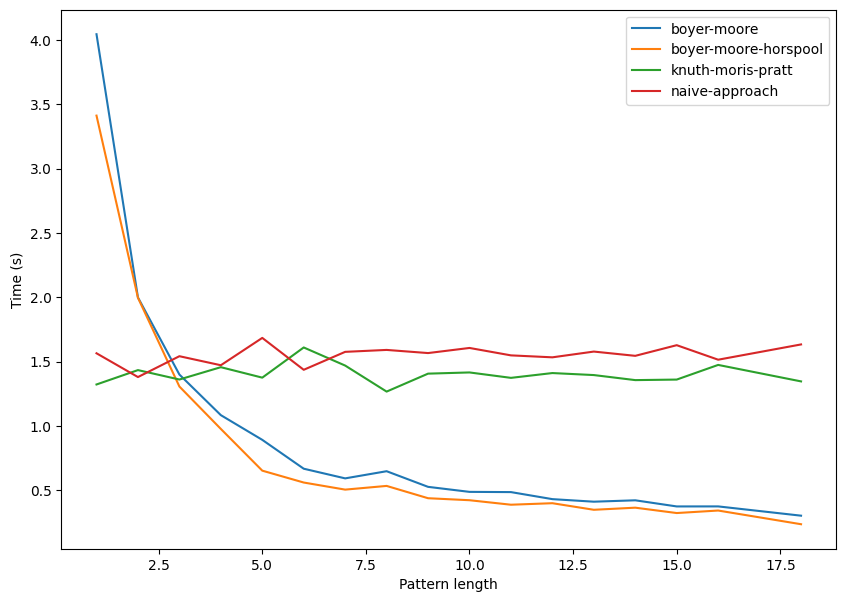

In [ ]:
ax = eng_res_df.plot(x='pattern_length', y=['boyer-moore', 'boyer-moore-horspool', 'knuth-moris-pratt', 'naive-approach'], kind="line", figsize=(10, 7))
ax.set_ylabel('Time (s)')
ax.set_xlabel('Pattern length')
ax.figure.savefig('data/eng_plots.png')

# References

- KMP is refered based on Assignment notes of CSCI-5454 Algorithms by Prof. Sriram Sankaranarayanan
- BM algo implementation: Good suffix rule in Boyer Moore algorithm explained simply - https://medium.com/@neethamadhu.ma/good-suffix-rule-in-boyer-moore-algorithm-explained-simply-9d9b6d20a773
- DNA and engilsh characters dataset and comparision Ch10 Information Retrieval: Data Structures & Algorithms 
